In [2]:
#import necessary python libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
#read the csv file

df=pd.read_csv("Social-Network.csv")

In [4]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [6]:
df.head(10)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [7]:
df.isnull()

,Age,EstimatedSalary,Purchased
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
395,False,False,False
396,False,False,False
397,False,False,False
398,False,False,False


In [8]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
df.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [10]:
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [14]:
#drop the columns

X=df.drop(['EstimatedSalary','Purchased'],axis=1)
Y= df['Purchased']
X.head()
     

,Age
0,19
1,35
2,26
3,27
4,19


<function matplotlib.pyplot.show(close=None, block=None)>

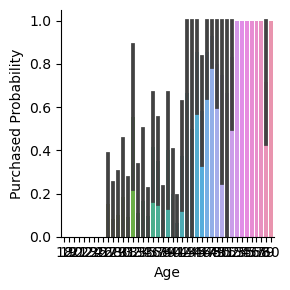

In [18]:
#catplot 

g = sns.catplot(x = "Age",y = "Purchased",data = df,kind = "bar",height = 3)
g.set_ylabels("Purchased Probability")
plt.show
     

In [25]:
#get input variable into x and output variable into y

x=df.drop(['Age','Purchased'],axis=1)
y=df['Purchased']
x.head()

,EstimatedSalary
0,19000
1,20000
2,43000
3,57000
4,76000


In [21]:
#splitting the data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y , test_size=0.2 , random_state=30)

In [28]:
#build the model via logistic regression

from sklearn.linear_model import LogisticRegression
basemodel=LogisticRegression()
basemodel.fit(x_train,y_train)
print('Training accuracy', basemodel.score(x_test,y_test)*100)

Training accuracy 75.0


In [27]:
#measure the performance of the model

y_predict=basemodel.predict(x_test)
print('Training Accuracy',basemodel.score(x_train,y_train)*100)

Training Accuracy 77.8125


In [30]:
from sklearn.metrics import accuracy_score
Acc=accuracy_score(y_test,y_predict)
print(Acc)

0.75


In [33]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
print(cm)

[[49  0]
 [20 11]]


In [34]:
from sklearn.metrics import precision_recall_fscore_support
prf=precision_recall_fscore_support (y_test , y_predict)
print('Precision:', prf[0])
print('Recall:' , prf[1])
print('fscore:' , prf[2])
print('support:' , prf[3])

Precision: [0.71014493 1.        ]
Recall: [1.         0.35483871]
fscore: [0.83050847 0.52380952]
support: [49 31]
